[*********************100%%**********************]  1 of 1 completed


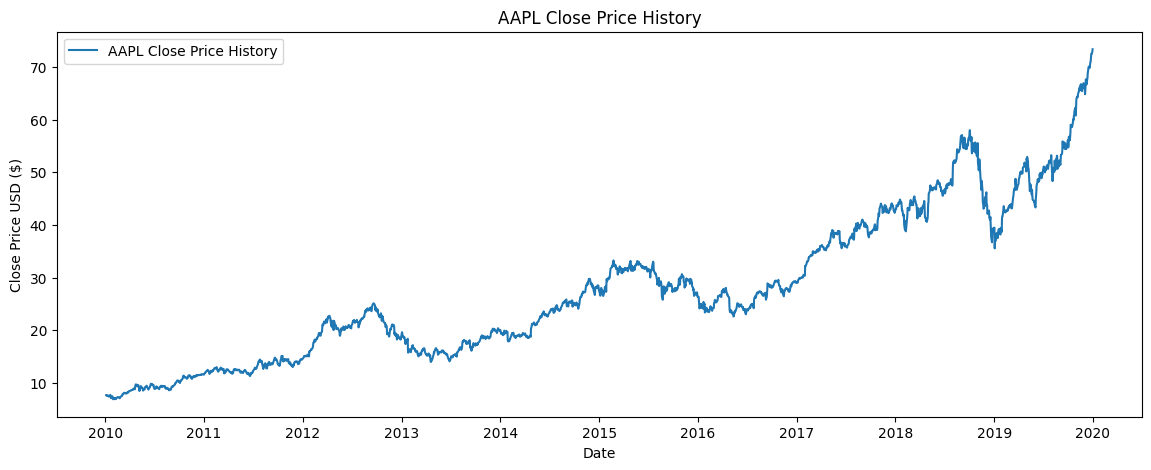

c:\Users\Admin\Documents\Python_AI\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2331/2331 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - loss: 0.0016
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step


C:\Users\Admin\AppData\Local\Temp\ipykernel_3488\822978463.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


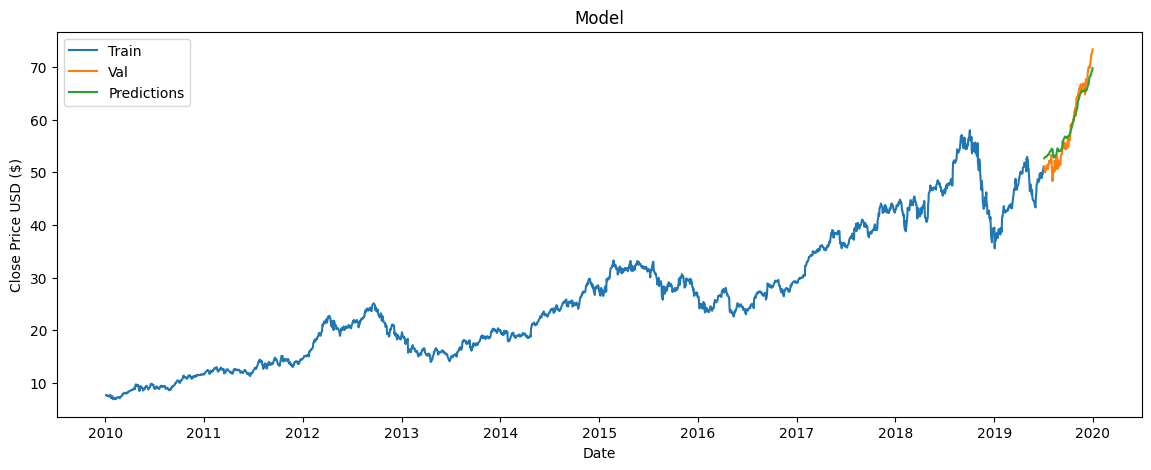

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

# Load stock data
start_date = '2010-01-01'
end_date = '2020-01-01'
stock_symbol = 'AAPL'

# Fetch data from Yahoo Finance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Plot the closing price history
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label=f'{stock_symbol} Close Price History')
plt.title(f'{stock_symbol} Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Prepare data for LSTM model
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Val', 'Predictions'])
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()


In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Fetch stock data from Yahoo Finance
stock_symbol = 'VNM'  # Example: Vinamilk
start_date = '2010-01-01'
end_date = '2020-01-01'

# Download the data
df = yf.download(f"{stock_symbol}.VN", start=start_date, end=end_date)

# Check if data is available
if df.empty:
    raise ValueError(f"No data found for {stock_symbol}")

# Plot the closing price history
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label=f'{stock_symbol} Close Price History')
plt.title(f'{stock_symbol} Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

# Prepare data for LSTM model
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 5))
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label=['Val', 'Predictions'])
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VNM.VN']: YFChartError("%ticker%: Data doesn't exist for startDate = 1262278800, endDate = 1577811600")


ValueError: No data found for VNM

In [10]:
import investpy

# List all indices available for Vietnam
indices = investpy.indices.get_indices(country='vietnam')
print(indices)


    country                            name                       full_name  \
0   vietnam                FTSE Viet All TR                FTSE Viet All TR   
1   vietnam                           VN100                           VN100   
2   vietnam                              VN                              VN   
3   vietnam                             HNX                             HNX   
4   vietnam             FTSE Vietnam TR USD             FTSE Vietnam TR USD   
5   vietnam                   VN All Shares                   VN All Shares   
6   vietnam                    Vn Small Cap                    Vn Small Cap   
7   vietnam                FTSE Vietnam All                FTSE Vietnam All   
8   vietnam                HNX Construction                HNX Construction   
9   vietnam                   HNX Large Cap                   HNX Large Cap   
10  vietnam                           VN 30                           VN 30   
11  vietnam                          HNX 30         

In [14]:
import investpy
import matplotlib.pyplot as plt

# Set parameters
stock_symbol = 'vnindex'
start_date = '01/01/2010'
end_date = '01/01/2020'

try:
    # Fetch data from Investing.com
    df = investpy.get_index_historical_data(index=stock_symbol,
                                            country='vietnam',
                                            from_date=start_date,
                                            to_date=end_date)

    # Check if data is available
    if df.empty:
        raise ValueError(f"No data found for {stock_symbol}")

    # Plot the closing price history
    plt.figure(figsize=(14, 5))
    plt.plot(df['Close'], label=f'{stock_symbol} Close Price History')
    plt.title(f'{stock_symbol} Close Price History')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(loc='upper left')
    plt.show()

except Exception as e:
    print(f"Error fetching data: {e}")


Error fetching data: ERR#0045: index vnindex not found, check if it is correct.
